# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.156924e+01     7.647719e+00
 * time: 0.0045299530029296875
     1     2.783363e+01     4.399753e+00
 * time: 0.013143062591552734
     2     2.711396e+01     1.036388e+01
 * time: 0.03502988815307617
     3     1.311978e+01     1.907295e+00
 * time: 0.06003689765930176
     4     1.260083e+01     2.538077e+00
 * time: 0.07733607292175293
     5     1.205157e+01     2.738426e+00
 * time: 0.0952610969543457
     6     1.092946e+01     2.771656e+00
 * time: 0.11338400840759277
     7     9.723278e+00     1.362040e+00
 * time: 0.13111495971679688
     8     9.237793e+00     9.155408e-01
 * time: 0.1488208770751953
     9     9.022623e+00     5.614225e-01
 * time: 0.16610002517700195
    10     8.907407e+00     8.875748e-01
 * time: 0.17934107780456543
    11     8.845821e+00     8.060501e-01
 * time: 0.19234490394592285
    12     8.806757e+00     5.479778e-01
 * time: 0.20580291748046875
    13     8.743125e+00     4.935290e-01
 * time

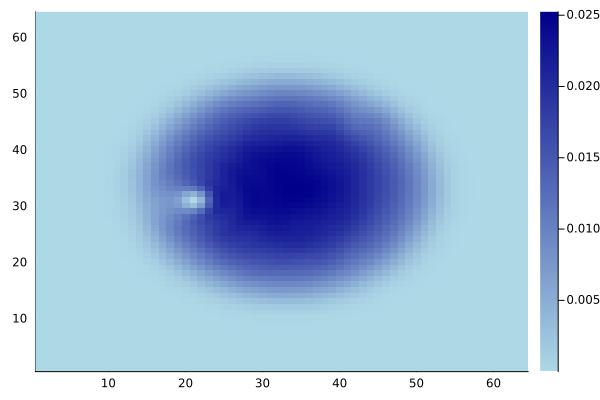

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)